# Competição 1


Alisson Gurgel - 831645

## Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Bibliotecas importadas com sucesso")

Bibliotecas importadas com sucesso


# Importação dos dados


In [ ]:
train_data = pd.read_csv('data/train.csv')
test_data =  pd.read_csv('data/test.csv')

print(f"Dados de treino: {train_data.shape[0]} linhas e {train_data.shape[1]} colunas")
print(f"Dados de teste: {test_data.shape[0]} linhas e {test_data.shape[1]} colunas")
print("\nDados carregados com sucesso")

Dados de treino: 1460 linhas e 81 colunas
Dados de teste: 1459 linhas e 80 colunas

Dados carregados com sucesso


## Análise exploraória dos dados

In [ ]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Análise da variável SalePrice

 Análise do Preço de Venda (SalePrice):

Preço médio: $180,921.20
Preço mediano: $163,000.00
Preço mínimo: $34,900.00
Preço máximo: $755,000.00
Desvio padrão: $79,442.50


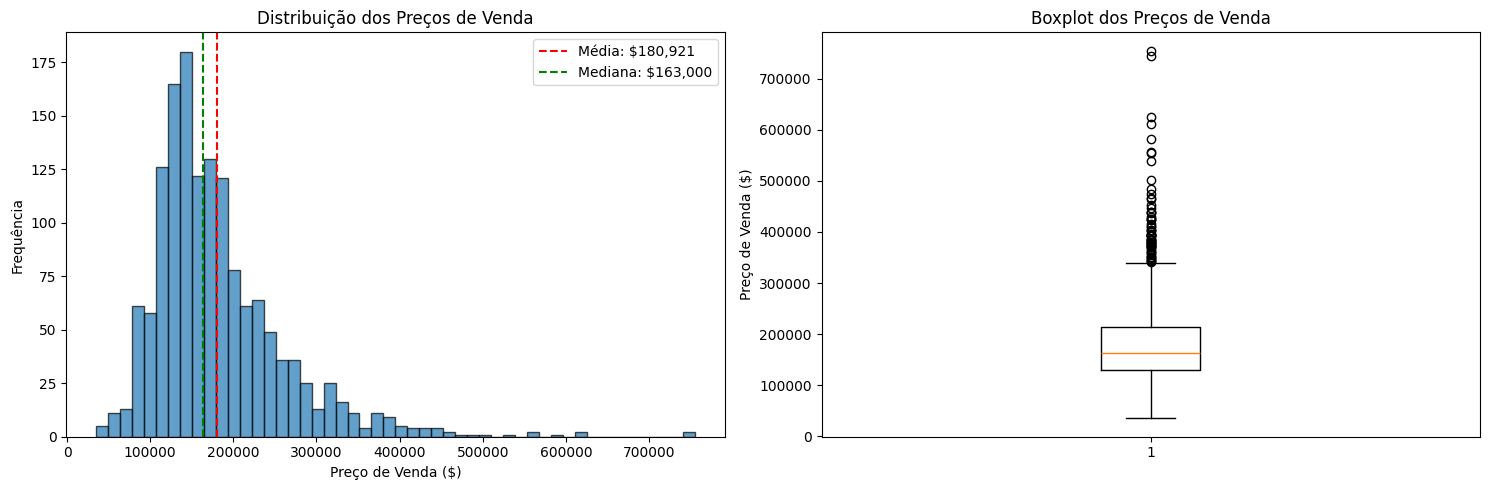

In [ ]:
print(" Análise do Preço de Venda (SalePrice):\n")
print(f"Preço médio: ${train_data['SalePrice'].mean():,.2f}")
print(f"Preço mediano: ${train_data['SalePrice'].median():,.2f}")
print(f"Preço mínimo: ${train_data['SalePrice'].min():,.2f}")
print(f"Preço máximo: ${train_data['SalePrice'].max():,.2f}")
print(f"Desvio padrão: ${train_data['SalePrice'].std():,.2f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(train_data['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Preço de Venda ($)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição dos Preços de Venda')
axes[0].axvline(train_data['SalePrice'].mean(), color='red', linestyle='--', label=f'Média: ${train_data["SalePrice"].mean():,.0f}')
axes[0].axvline(train_data['SalePrice'].median(), color='green', linestyle='--', label=f'Mediana: ${train_data["SalePrice"].median():,.0f}')
axes[0].legend()

axes[1].boxplot(train_data['SalePrice'], vert=True)
axes[1].set_ylabel('Preço de Venda ($)')
axes[1].set_title('Boxplot dos Preços de Venda')

plt.tight_layout()
plt.show()

#Análise de valores faltantes

🔍 Colunas com valores faltantes: 19

              Total  Percentual
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
MasVnrType      872   59.726027
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageType       81    5.547945
GarageYrBlt      81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
GarageCond       81    5.547945
BsmtExposure     38    2.602740
BsmtFinType2     38    2.602740
BsmtQual         37    2.534247
BsmtCond         37    2.534247
BsmtFinType1     37    2.534247
MasVnrArea        8    0.547945
Electrical        1    0.068493


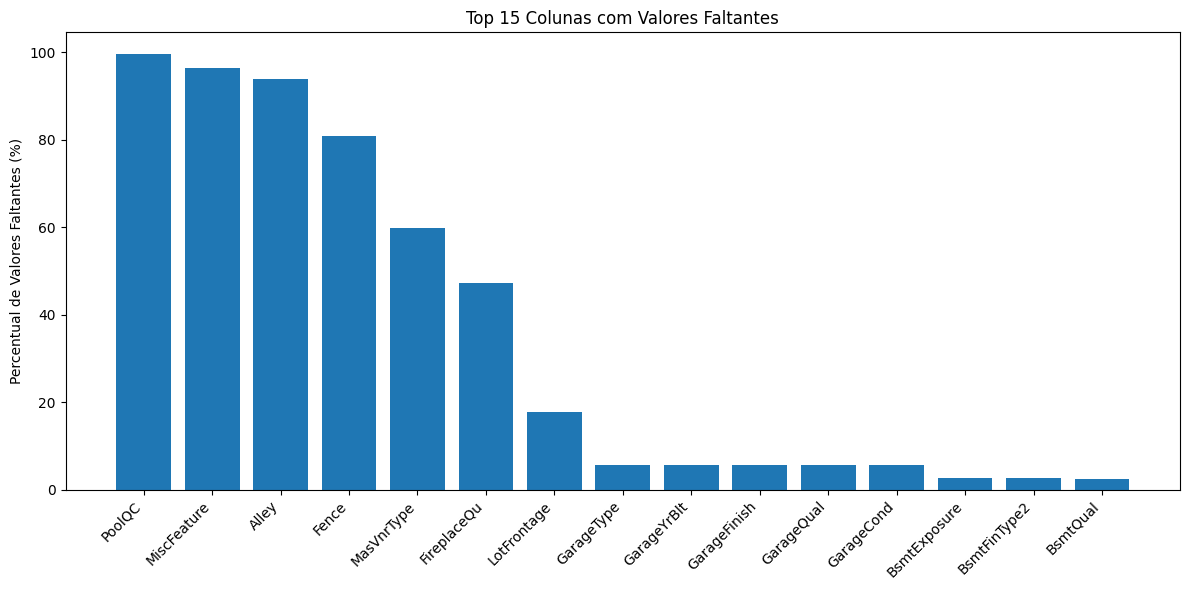

In [ ]:
missing_train = train_data.isnull().sum()
missing_train_percent = 100 * missing_train / len(train_data)

missing_data = pd.DataFrame({
    'Total': missing_train,
    'Percentual': missing_train_percent
})

missing_data = missing_data[missing_data['Total'] > 0].sort_values('Total', ascending=False)

print(f"🔍 Colunas com valores faltantes: {len(missing_data)}\n")
print(missing_data.head(20))

plt.figure(figsize=(12, 6))
plt.bar(range(len(missing_data.head(15))), missing_data['Percentual'].head(15))
plt.xticks(range(len(missing_data.head(15))), missing_data.head(15).index, rotation=45, ha='right')
plt.ylabel('Percentual de Valores Faltantes (%)')
plt.title('Top 15 Colunas com Valores Faltantes')
plt.tight_layout()
plt.show()

remover colunas com muitos nulos

In [ ]:
cols_to_drop = missing_data[missing_data['Percentual'] > 15].index
print(f"\n🗑️ Removendo {len(cols_to_drop)} colunas: {list(cols_to_drop)}")
train_data.drop(columns=cols_to_drop, inplace=True)

test_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"✅ Colunas removidas de ambos os conjuntos (treino e teste)")


🗑️ Removendo 7 colunas: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage']
✅ Colunas removidas de ambos os conjuntos (treino e teste)


🔗 Top 15 variáveis mais correlacionadas com SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


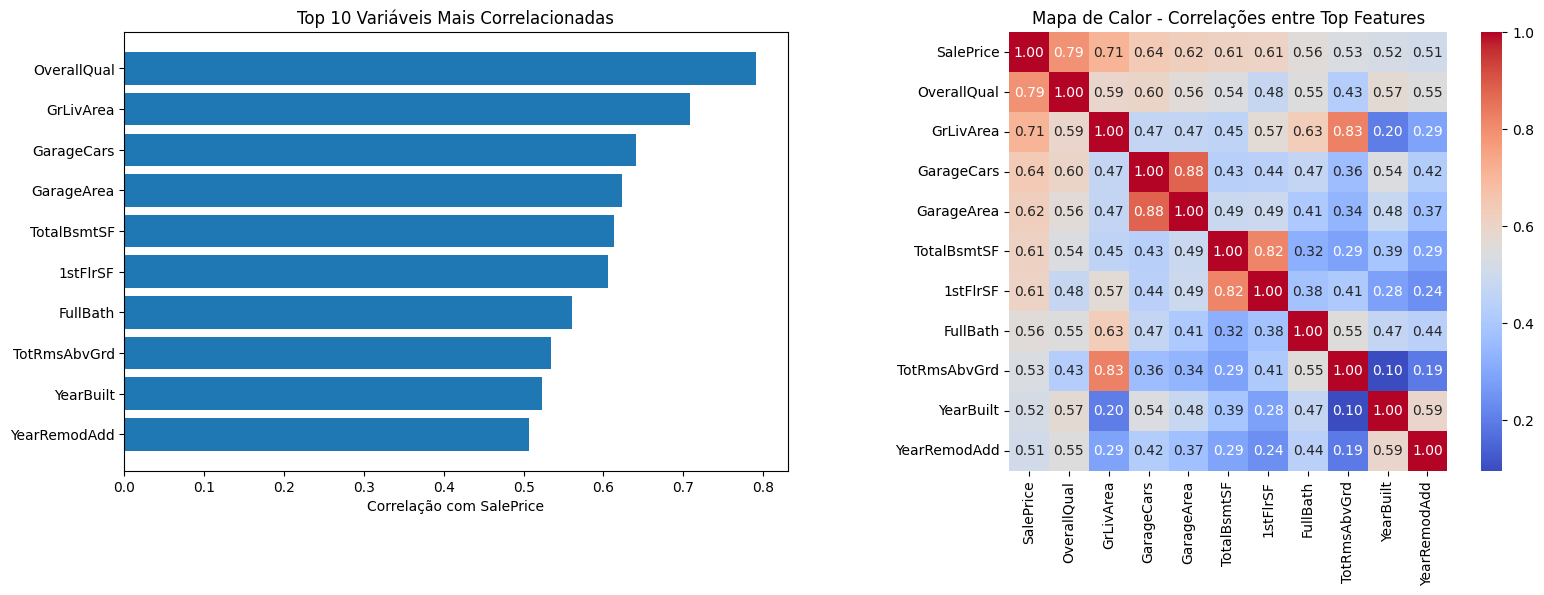

In [ ]:
numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

correlations = train_data[numeric_features].corr()['SalePrice'].sort_values(ascending=False)

print("🔗 Top 15 variáveis mais correlacionadas com SalePrice:\n")
print(correlations.head(15))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_corr = correlations.head(11)[1:]  # Excluir SalePrice (correlação 1.0 consigo mesmo)
axes[0].barh(range(len(top_corr)), top_corr.values)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index)
axes[0].set_xlabel('Correlação com SalePrice')
axes[0].set_title('Top 10 Variáveis Mais Correlacionadas')
axes[0].invert_yaxis()

top_features = correlations.head(11).index
correlation_matrix = train_data[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1], square=True)
axes[1].set_title('Mapa de Calor - Correlações entre Top Features')

plt.tight_layout()
plt.show()


#Relação entre variáveis e preço

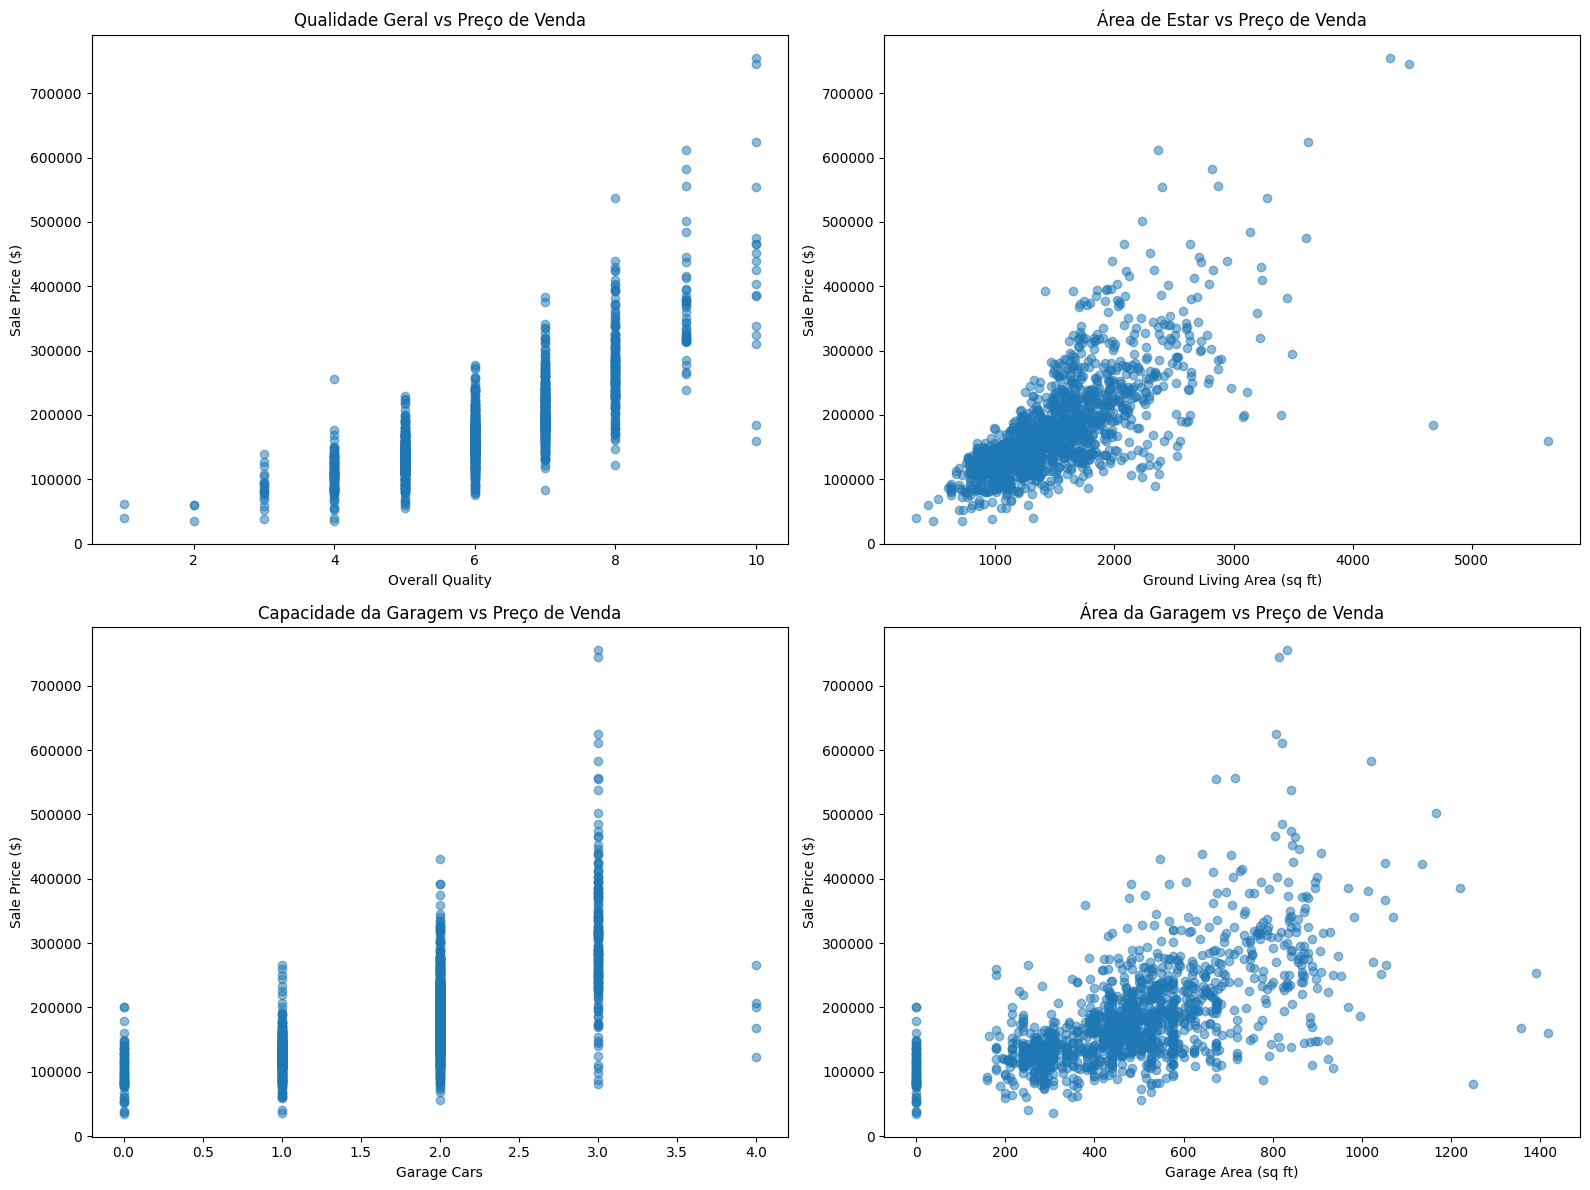

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].scatter(train_data['OverallQual'], train_data['SalePrice'], alpha=0.5)
axes[0, 0].set_xlabel('Overall Quality')
axes[0, 0].set_ylabel('Sale Price ($)')
axes[0, 0].set_title('Qualidade Geral vs Preço de Venda')

axes[0, 1].scatter(train_data['GrLivArea'], train_data['SalePrice'], alpha=0.5)
axes[0, 1].set_xlabel('Ground Living Area (sq ft)')
axes[0, 1].set_ylabel('Sale Price ($)')
axes[0, 1].set_title('Área de Estar vs Preço de Venda')

axes[1, 0].scatter(train_data['GarageCars'], train_data['SalePrice'], alpha=0.5)
axes[1, 0].set_xlabel('Garage Cars')
axes[1, 0].set_ylabel('Sale Price ($)')
axes[1, 0].set_title('Capacidade da Garagem vs Preço de Venda')

axes[1, 1].scatter(train_data['GarageArea'], train_data['SalePrice'], alpha=0.5)
axes[1, 1].set_xlabel('Garage Area (sq ft)')
axes[1, 1].set_ylabel('Sale Price ($)')
axes[1, 1].set_title('Área da Garagem vs Preço de Venda')

plt.tight_layout()
plt.show()

#Tratamento de dados

In [ ]:
y = train_data['SalePrice'].copy()

X = train_data.drop(['SalePrice', 'Id'], axis=1)

test_ids = test_data['Id'].copy()
X_test_final = test_data.drop(['Id'], axis=1)

print("✅ Separação realizada:")
print(f"   X (features de treino): {X.shape}")
print(f"   y (target): {y.shape}")
print(f"   X_test (features de teste): {X_test_final.shape}")

✅ Separação realizada:
   X (features de treino): (1460, 72)
   y (target): (1460,)
   X_test (features de teste): (1459, 72)


In [ ]:
X_numeric = X.select_dtypes(include=[np.number])
X_test_numeric = X_test_final.select_dtypes(include=[np.number])

print(f"🔢 Variáveis numéricas selecionadas: {X_numeric.shape[1]} de {X.shape[1]} colunas totais")
print(f"\nPrimeiras variáveis numéricas:\n{X_numeric.columns.tolist()[:10]}")
print(f"...")

🔢 Variáveis numéricas selecionadas: 35 de 72 colunas totais

Primeiras variáveis numéricas:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
...


In [ ]:
print("❌ Valores faltantes ANTES do tratamento:")
print(f"   Treino: {X_numeric.isnull().sum().sum()} valores faltantes")
print(f"   Teste: {X_test_numeric.isnull().sum().sum()} valores faltantes")

X_numeric_filled = X_numeric.fillna(X_numeric.median())

medians_train = X_numeric.median()
X_test_numeric_filled = X_test_numeric.copy()

for col in X_test_numeric_filled.columns:
    if col in medians_train.index:
        # Usar mediana do treino
        X_test_numeric_filled[col].fillna(medians_train[col], inplace=True)
    else:
        # Se a coluna não existe no treino, usar mediana do próprio teste
        X_test_numeric_filled[col].fillna(X_test_numeric_filled[col].median(), inplace=True)

print("\n✅ Valores faltantes DEPOIS do tratamento:")
print(f"   Treino: {X_numeric_filled.isnull().sum().sum()} valores faltantes")
print(f"   Teste: {X_test_numeric_filled.isnull().sum().sum()} valores faltantes")

if X_test_numeric_filled.isnull().sum().sum() > 0:
    print("\n⚠️ Colunas com valores faltantes restantes no teste:")
    cols_with_nulls = X_test_numeric_filled.isnull().sum()
    print(cols_with_nulls[cols_with_nulls > 0])

print("\n💡 Observação: Usamos a mediana do conjunto de treino para preencher ambos os conjuntos!")

❌ Valores faltantes ANTES do tratamento:
   Treino: 89 valores faltantes
   Teste: 103 valores faltantes

✅ Valores faltantes DEPOIS do tratamento:
   Treino: 0 valores faltantes
   Teste: 0 valores faltantes

💡 Observação: Usamos a mediana do conjunto de treino para preencher ambos os conjuntos!


In [ ]:
print("🔄 Convertendo variáveis numéricas para categóricas...")

cols_to_convert = ['MSSubClass', 'MoSold']

for col in cols_to_convert:
    if col in X.columns:
        X[col] = X[col].astype(str)

    if col in X_test_final.columns:
        X_test_final[col] = X_test_final[col].astype(str)

print(f"✅ Colunas {cols_to_convert} agora são tratadas como texto.")

print("🏷️ Tratamento de Variáveis Categóricas\n")

X_categorical = X.select_dtypes(include=['object'])
X_test_categorical = X_test_final.select_dtypes(include=['object'])

print(f"📊 Variáveis categóricas encontradas: {X_categorical.shape[1]}")
print(f"Exemplos: {X_categorical.columns.tolist()[:5]}")

X_categorical_filled = X_categorical.fillna('Missing')
X_test_categorical_filled = X_test_categorical.fillna('Missing')

print("\n🔄 Aplicando One-Hot Encoding...")
X_categorical_encoded = pd.get_dummies(X_categorical_filled, drop_first=True)
X_test_categorical_encoded = pd.get_dummies(X_test_categorical_filled, drop_first=True)

missing_cols_in_test = set(X_categorical_encoded.columns) - set(X_test_categorical_encoded.columns)
missing_cols_in_train = set(X_test_categorical_encoded.columns) - set(X_categorical_encoded.columns)

for col in missing_cols_in_test:
    X_test_categorical_encoded[col] = 0

for col in missing_cols_in_train:
    X_categorical_encoded[col] = 0

X_test_categorical_encoded = X_test_categorical_encoded[X_categorical_encoded.columns]

print(f"✅ Encoding completo!")
print(f"   Treino: {X_categorical_encoded.shape[1]} features categóricas codificadas")
print(f"   Teste: {X_test_categorical_encoded.shape[1]} features categóricas codificadas")

X_combined = pd.concat([X_numeric_filled, X_categorical_encoded], axis=1)
X_test_combined = pd.concat([X_test_numeric_filled, X_test_categorical_encoded], axis=1)

print(f"\n🎯 Dataset final combinado:")
print(f"   Treino: {X_combined.shape[0]} linhas × {X_combined.shape[1]} features")
print(f"   ({X_numeric_filled.shape[1]} numéricas + {X_categorical_encoded.shape[1]} categóricas)")
print(f"   Teste: {X_test_combined.shape[0]} linhas × {X_test_combined.shape[1]} features")

print("\n💡 Observação: One-Hot Encoding transforma cada categoria em uma coluna binária (0 ou 1).")
print("   Por exemplo, 'Neighborhood' com 3 valores vira 2 colunas novas (drop_first=True).")

🔄 Convertendo variáveis numéricas para categóricas...
✅ Colunas ['MSSubClass', 'MoSold'] agora são tratadas como texto.
🏷️ Tratamento de Variáveis Categóricas

📊 Variáveis categóricas encontradas: 39
Exemplos: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour']

🔄 Aplicando One-Hot Encoding...
✅ Encoding completo!
   Treino: 236 features categóricas codificadas
   Teste: 236 features categóricas codificadas

🎯 Dataset final combinado:
   Treino: 1460 linhas × 271 features
   (35 numéricas + 236 categóricas)
   Teste: 1459 linhas × 271 features

💡 Observação: One-Hot Encoding transforma cada categoria em uma coluna binária (0 ou 1).
   Por exemplo, 'Neighborhood' com 3 valores vira 2 colunas novas (drop_first=True).


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_combined,
    y,
    test_size=0.2,
    random_state=42  # Para reprodutibilidade
)

print("✅ Dados divididos:")
print(f"   Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X_combined)*100:.1f}%)")
print(f"   Validação: {X_val.shape[0]} amostras ({X_val.shape[0]/len(X_combined)*100:.1f}%)")
print(f"   Features: {X_train.shape[1]} variáveis ({X_numeric_filled.shape[1]} numéricas + {X_categorical_encoded.shape[1]} categóricas)")

✅ Dados divididos:
   Treino: 1168 amostras (80.0%)
   Validação: 292 amostras (20.0%)
   Features: 271 variáveis (35 numéricas + 236 categóricas)


#Aplicação de machine learning

Métricas de avaliação

In [ ]:
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """
    Treina e avalia um modelo de ML
    """
    # Treinar o modelo
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    print(f"\n{'='*60}")
    print(f"📊 Resultados - {model_name}")
    print(f"{'='*60}")
    print(f"\n{'Métrica':<20} {'Treino':>15} {'Validação':>15}")
    print(f"{'-'*60}")
    print(f"{'MAE':<20} ${train_mae:>14,.2f} ${val_mae:>14,.2f}")
    print(f"{'RMSE':<20} ${train_rmse:>14,.2f} ${val_rmse:>14,.2f}")
    print(f"{'R² Score':<20} {train_r2:>15.4f} {val_r2:>15.4f}")

    return model, val_rmse

Regressão linear

In [ ]:
lr_model = LinearRegression()
lr_model, lr_rmse = evaluate_model(lr_model, X_train, y_train, X_val, y_val, "Regressão Linear")

print("\n💡 Interpretação: O RMSE indica o erro médio das previsões. Quanto menor, melhor!")


📊 Resultados - Regressão Linear

Métrica                       Treino       Validação
------------------------------------------------------------
MAE                  $     12,666.47 $     20,393.84
RMSE                 $     19,705.26 $     51,879.00
R² Score                      0.9349          0.6491

💡 Interpretação: O RMSE indica o erro médio das previsões. Quanto menor, melhor!


Random forest

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,      # Número de árvores
    max_depth=15,          # Profundidade máxima das árvores
    random_state=42,
    n_jobs=-1              # Usar todos os processadores
)

rf_model, rf_rmse = evaluate_model(rf_model, X_train, y_train, X_val, y_val, "Random Forest")

print("\n💡 Random Forest geralmente tem melhor performance que modelos lineares em problemas complexos!")


📊 Resultados - Random Forest

Métrica                       Treino       Validação
------------------------------------------------------------
MAE                  $      6,720.78 $     17,638.15
RMSE                 $     11,394.34 $     28,446.93
R² Score                      0.9782          0.8945

💡 Random Forest geralmente tem melhor performance que modelos lineares em problemas complexos!


Gradient Boosting


In [ ]:
gb_model = GradientBoostingRegressor(
    n_estimators=200,      # Número de árvores
    learning_rate=0.1,     # Taxa de aprendizado
    max_depth=5,           # Profundidade máxima das árvores
    random_state=42
)

gb_model, gb_rmse = evaluate_model(gb_model, X_train, y_train, X_val, y_val, "Gradient Boosting")

print("\n💡 Gradient Boosting é frequentemente o vencedor em competições com dados tabulares!")


📊 Resultados - Gradient Boosting

Métrica                       Treino       Validação
------------------------------------------------------------
MAE                  $      3,108.46 $     16,662.15
RMSE                 $      4,042.56 $     25,783.78
R² Score                      0.9973          0.9133

💡 Gradient Boosting é frequentemente o vencedor em competições com dados tabulares!


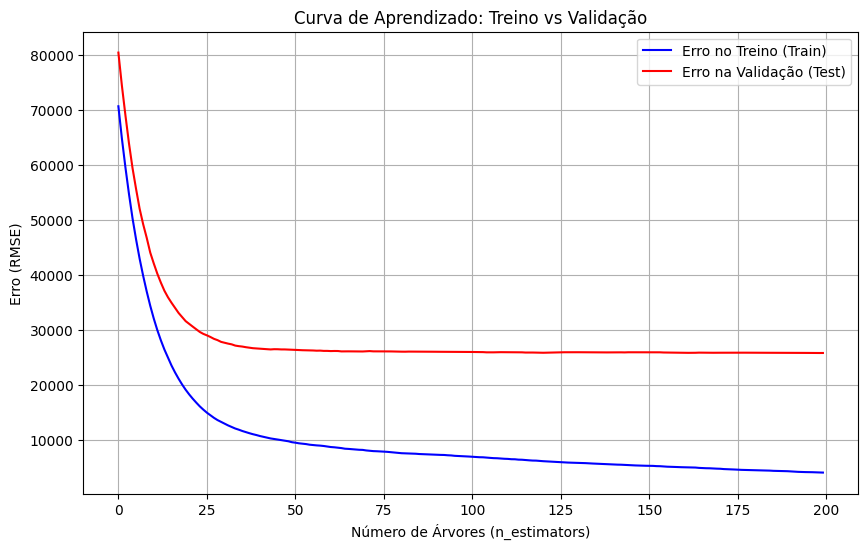

In [ ]:
def plot_learning_curve(model, X_train, y_train, X_val, y_val):
    # Calcula o erro (MSE) a cada árvore adicionada (estágio)
    train_errors = []
    val_errors = []

    # staged_predict gera a previsão progressivamente (árvore 1, árvore 1+2, etc.)
    for y_pred in model.staged_predict(X_train):
        train_errors.append(mean_squared_error(y_train, y_pred))

    for y_pred in model.staged_predict(X_val):
        val_errors.append(mean_squared_error(y_val, y_pred))

    # Plotando o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(np.sqrt(train_errors), 'b-', label='Erro no Treino (Train)')
    plt.plot(np.sqrt(val_errors), 'r-', label='Erro na Validação (Test)')

    plt.title('Curva de Aprendizado: Treino vs Validação')
    plt.xlabel('Número de Árvores (n_estimators)')
    plt.ylabel('Erro (RMSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Chama a função passando seu modelo JÁ TREINADO
plot_learning_curve(gb_model, X_train, y_train, X_val, y_val)

Comparação entre modelos

📊 RANKING DOS MODELOS (menor RMSE é melhor):

           Modelo  RMSE (Validação)
Gradient Boosting      25783.783180
    Random Forest      28446.927252
Linear Regression      51879.002192


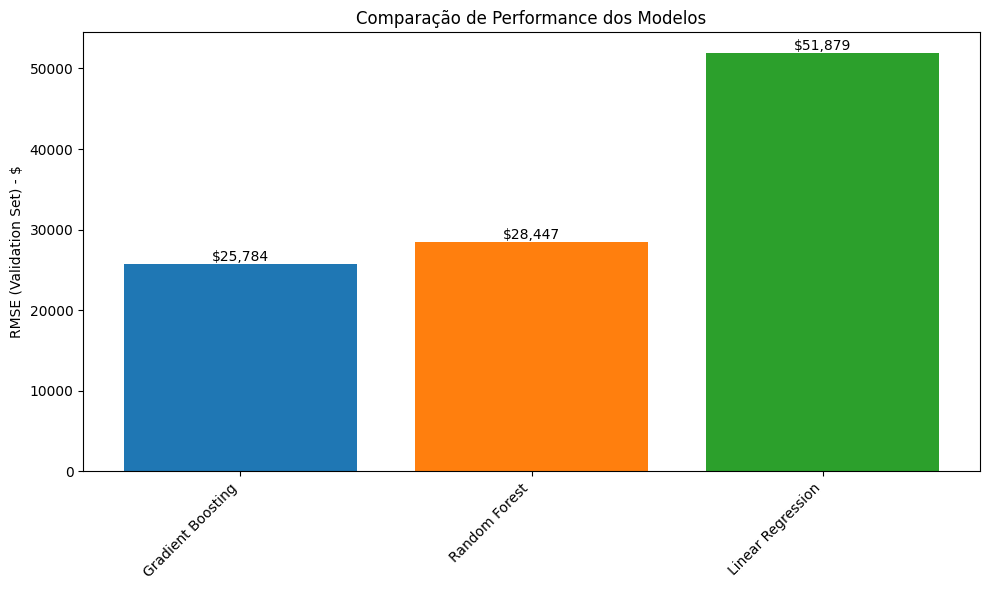


🏆 MELHOR MODELO: Gradient Boosting com RMSE de $25,783.78

💡 Este é o modelo que usaremos para fazer as previsões finais!


In [ ]:
# Criar DataFrame com resultados
results = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE (Validação)': [lr_rmse, rf_rmse, gb_rmse]
}).sort_values('RMSE (Validação)')

print("📊 RANKING DOS MODELOS (menor RMSE é melhor):\n")
print(results.to_string(index=False))

# Visualização
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Modelo'], results['RMSE (Validação)'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylabel('RMSE (Validation Set) - $')
plt.title('Comparação de Performance dos Modelos')
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Identificar o melhor modelo
best_model_name = results.iloc[0]['Modelo']
best_rmse = results.iloc[0]['RMSE (Validação)']
print(f"\n🏆 MELHOR MODELO: {best_model_name} com RMSE de ${best_rmse:,.2f}")
print(f"\n💡 Este é o modelo que usaremos para fazer as previsões finais!")

In [ ]:
model_1 = gb_model
model_2 = Ridge(alpha=10)

ensemble_model = VotingRegressor(
    estimators=[
        ('gb', model_1),
        ('ridge', model_2)
    ]
)

print("\n🤝 Treinando o Ensemble...")
ensemble_model.fit(X_train, y_train)

ensemble_model, ensemble_rmse = evaluate_model(ensemble_model, X_train, y_train, X_val, y_val, "Ensemble (GB + Ridge)")


🤝 Treinando o Ensemble...

📊 Resultados - Ensemble (GB + Ridge)

Métrica                       Treino       Validação
------------------------------------------------------------
MAE                  $      8,539.56 $     15,523.00
RMSE                 $     13,548.57 $     26,120.02
R² Score                      0.9692          0.9111


Gerando previsões

In [ ]:
# Treinar o melhor modelo (Gradient Boosting) em todos os dados de treino
print("🔄 Treinando modelo final em todos os dados de treino...")

final_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# IMPORTANTE: Usar X_combined que inclui features numéricas E categóricas
final_model.fit(X_combined, y)

print("✅ Modelo final treinado com sucesso!")
print(f"   Dados usados: {X_combined.shape[0]} casas")
print(f"   Features: {X_combined.shape[1]} variáveis ({X_numeric_filled.shape[1]} numéricas + {X_categorical_encoded.shape[1]} categóricas)")

🔄 Treinando modelo final em todos os dados de treino...
✅ Modelo final treinado com sucesso!
   Dados usados: 1460 casas
   Features: 271 variáveis (35 numéricas + 236 categóricas)


In [ ]:
# Fazer previsões no conjunto de teste
print("🔮 Gerando previsões para o conjunto de teste...")

# IMPORTANTE: Usar X_test_combined que inclui features numéricas E categóricas
test_predictions = final_model.predict(X_test_combined)


🔮 Gerando previsões para o conjunto de teste...


In [ ]:
# Criar DataFrame com as previsões
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions
})

# Salvar arquivo de submissão
submission.to_csv('data/submission.csv', index=False)

print("✅ Arquivo de submissão criado com sucesso!")
print(f"   Arquivo: data/submission.csv")
print(f"   Formato: {submission.shape[0]} linhas, {submission.shape[1]} colunas")
print("\n📄 Primeiras linhas do arquivo de submissão:\n")
print(submission.head(10))

✅ Arquivo de submissão criado com sucesso!
   Arquivo: data/submission.csv
   Formato: 1459 linhas, 2 colunas

📄 Primeiras linhas do arquivo de submissão:

     Id      SalePrice
0  1461  123861.323220
1  1462  154160.185781
2  1463  191750.921338
3  1464  188921.675863
4  1465  190325.379145
5  1466  176801.550071
6  1467  173261.060137
7  1468  168619.344221
8  1469  184995.174716
9  1470  123667.644038


In [ ]:
# Mostra as 10 primeiras linhas, mas invertidas (Transposed)
# Use display() se estiver no Jupyter/Colab para ficar formatado
display(train_data.head(10).T)

,0,1,2,3,4,5,6,7,8,9
Id,1,2,3,4,5,6,7,8,9,10
MSSubClass,60,20,60,70,60,50,20,60,50,190
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo